In [211]:
import pandas as pd
import matplotlib.pyplot as plt

import math
import statistics
import numpy as np

**Config**

In [217]:
region = 'bremen'
partition_sizes = [50, 100, 200, 500, 1000]
num_steps = 20000
prefix = '../results/overlap/' + region + '/'

**Cell Skeleton Dimension**

In [213]:
print('partition size | cell skeleton dimension')
for p in partition_sizes:
	cell_skeleton_dimension = 0
	for i in range(p):
		with open('../results/overlap/' + region + '/' + str(p) + '/' + str(i + p) + '/maximum_union_cut.txt') as f:
			cut = int(f.readline())
			cell_skeleton_dimension = max(cell_skeleton_dimension, cut)
	print('{} | {}'.format(p, cell_skeleton_dimension))

partition size | cell skeleton dimension
50 | 95
100 | 80
200 | 69
500 | 50
1000 | 43


**Cell Skeleton Dimension of Transposed Graph**

In [214]:
print('partition size | cell skeleton dimension transposed')
for p in partition_sizes:
	cell_skeleton_dimension = 0
	for i in range(p):
		with open('../results/overlap/' + region + '/' + str(p) + '/' + str(i) + '/maximum_union_cut.txt') as f:
			cut = int(f.readline())
			cell_skeleton_dimension = max(cell_skeleton_dimension, cut)
	print('{} | {}'.format(p, cell_skeleton_dimension))

partition size | cell skeleton dimension transposed
50 | 96
100 | 80
200 | 65
500 | 48
1000 | 38


**Mean Union Cuts**

In [223]:
# retrieve distances once
distances = {}
for p in partition_sizes:
	distances[p] = np.zeros(num_steps + 1)
	df = pd.read_csv(prefix + str(p) + '/0/center_cuts.csv', delimiter=';')
	for i in df.index:
		distances[p][i] = int(df['dist'][i])

In [225]:
union_cuts = {}
union_cuts_transposed = {}
for p in partition_sizes:
	union_cuts[p] = np.zeros((p, num_steps + 1), dtype=np.longlong)
	union_cuts_transposed[p] = np.zeros((p, num_steps + 1), dtype=np.longlong)
	for i in range(p):
		df = pd.read_csv(prefix + str(p) + '/' + str(i + p) + '/union_cuts.csv', delimiter=';')
		for j in df.index:
			union_cuts[p][i][j] = int(df['count'][j])
		df = pd.read_csv(prefix + str(p) + '/' + str(i) + '/union_cuts.csv', delimiter=';')
		for j in df.index:
			union_cuts_transposed[p][i][j] = int(df['count'][j])

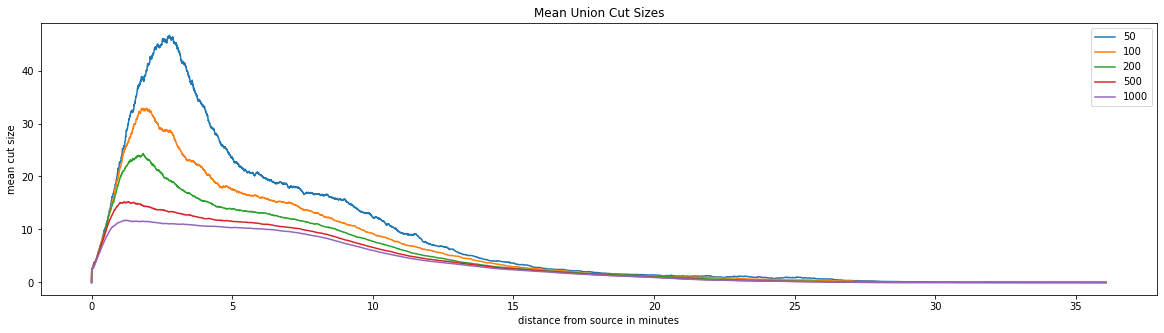

In [242]:
fig, ax = plt.subplots(figsize=(20,5))
for p in partition_sizes:
	ax.plot(distances[p][:num_steps // 2] / (6 * 10**10), union_cuts[p].mean(axis=0)[:num_steps // 2], label=str(p))
ax.set_xlabel('distance from source in minutes')
ax.set_ylabel('mean cut size')
ax.set_title('Mean Union Cut Sizes')
ax.legend()
fig.savefig('../results/overlap_' + region + '_meanUnionCutSizes.svg')


**Mean Union Cuts on Transposed Graph**

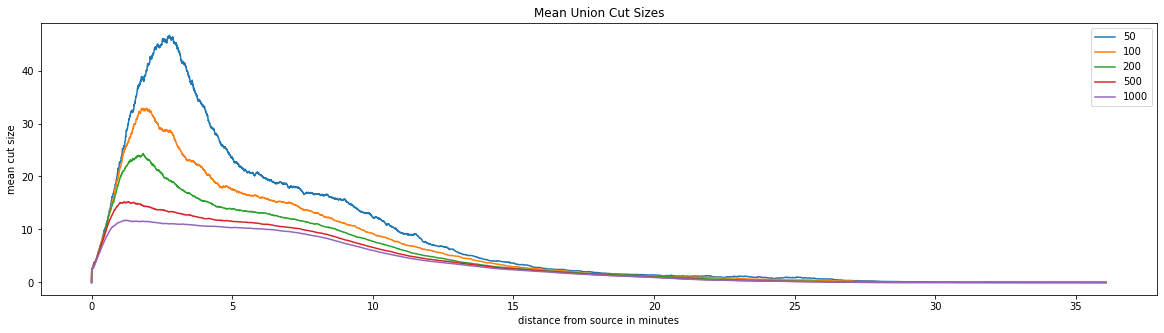

In [243]:
fig, ax = plt.subplots(figsize=(20,5))
for p in partition_sizes:
	ax.plot(distances[p][:num_steps // 2] / (6 * 10**10), union_cuts[p].mean(axis=0)[:num_steps // 2], label=str(p))
ax.set_xlabel('distance from source in minutes')
ax.set_ylabel('mean cut size')
ax.set_title('Mean Union Cut Sizes')
ax.legend()